## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_29150/3180376326.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import pandas as pd

def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

data_path = "motorbike_ambulance_calls.csv"

In [4]:
data = get_data(data_path)


print("Basic statistical information about numerical variables:")
print(data.describe())

print("\nMaximum values for all variables:")
print(data.max())
print("\nMinimum values for all variables:")
print(data.min())

print("\nDataset dimensions:")

print(data.shape)

Basic statistical information about numerical variables:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [5]:
print("Data type check:")
print(data.dtypes)

print("\nData count check for each variable:")
print(data.count())


Data type check:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Data count check for each variable:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [6]:
print("Checking for missing values in each variable:")
print(data.isnull().sum())


Checking for missing values in each variable:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

1. Аналізуючи виведені дані, можемо помітити значні коливання кількості взятих напрокат велосипедів щодня, але в середньому ця кількість складає приблизно 189.
2. За наявними змінними, такими як пора року, погода та температура, можна провести аналіз того, які погодні умови або яка пора року сприяють найбільшому попиту на велосипеди.
3. В результаті цього завдання ми відзначаємо, що жодна зі змінних не містить пропущених значень, всі вони заповнені коректно.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [8]:
import pandas as pd

def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df


In [9]:
data = transform_date(data, 'date')
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"The first day of the dataset is {first_day}.\nThe last day of the dataset is {last_day}")


get_time_limits(data, 'date')

The first day of the dataset is 2011-01-01 00:00:00.
The last day of the dataset is 2012-12-31 00:00:00


/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_29150/4113636490.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


Датасет містить дані за певний проміжок часу, що дозволяє нам аналізувати залежності протягом цього періоду.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [10]:
columns_to_select = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data_categorical = data.loc[:, columns_to_select]

print(data_categorical)

       season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0      spring   0     1   0        0        6           0           1
1      spring   0     1   1        0        6           0           1
2      spring   0     1   2        0        6           0           1
3      spring   0     1   3        0        6           0           1
4      spring   0     1   4        0        6           0           1
...       ...  ..   ...  ..      ...      ...         ...         ...
17374  spring   1    12  19        0        1           1           2
17375  spring   1    12  20        0        1           1           2
17376  spring   1    12  21        0        1           1           1
17377  spring   1    12  22        0        1           1           1
17378  spring   1    12  23        0        1           1           1

[17379 rows x 8 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [11]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    df[season_col_name] = df[season_col_name].replace({'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4})
    return df

data = encode_season(data, 'season')
print(data['season'].unique())

[1 2 3 4]


/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_29150/4277711259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[season_col_name] = df[season_col_name].replace({'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4})


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

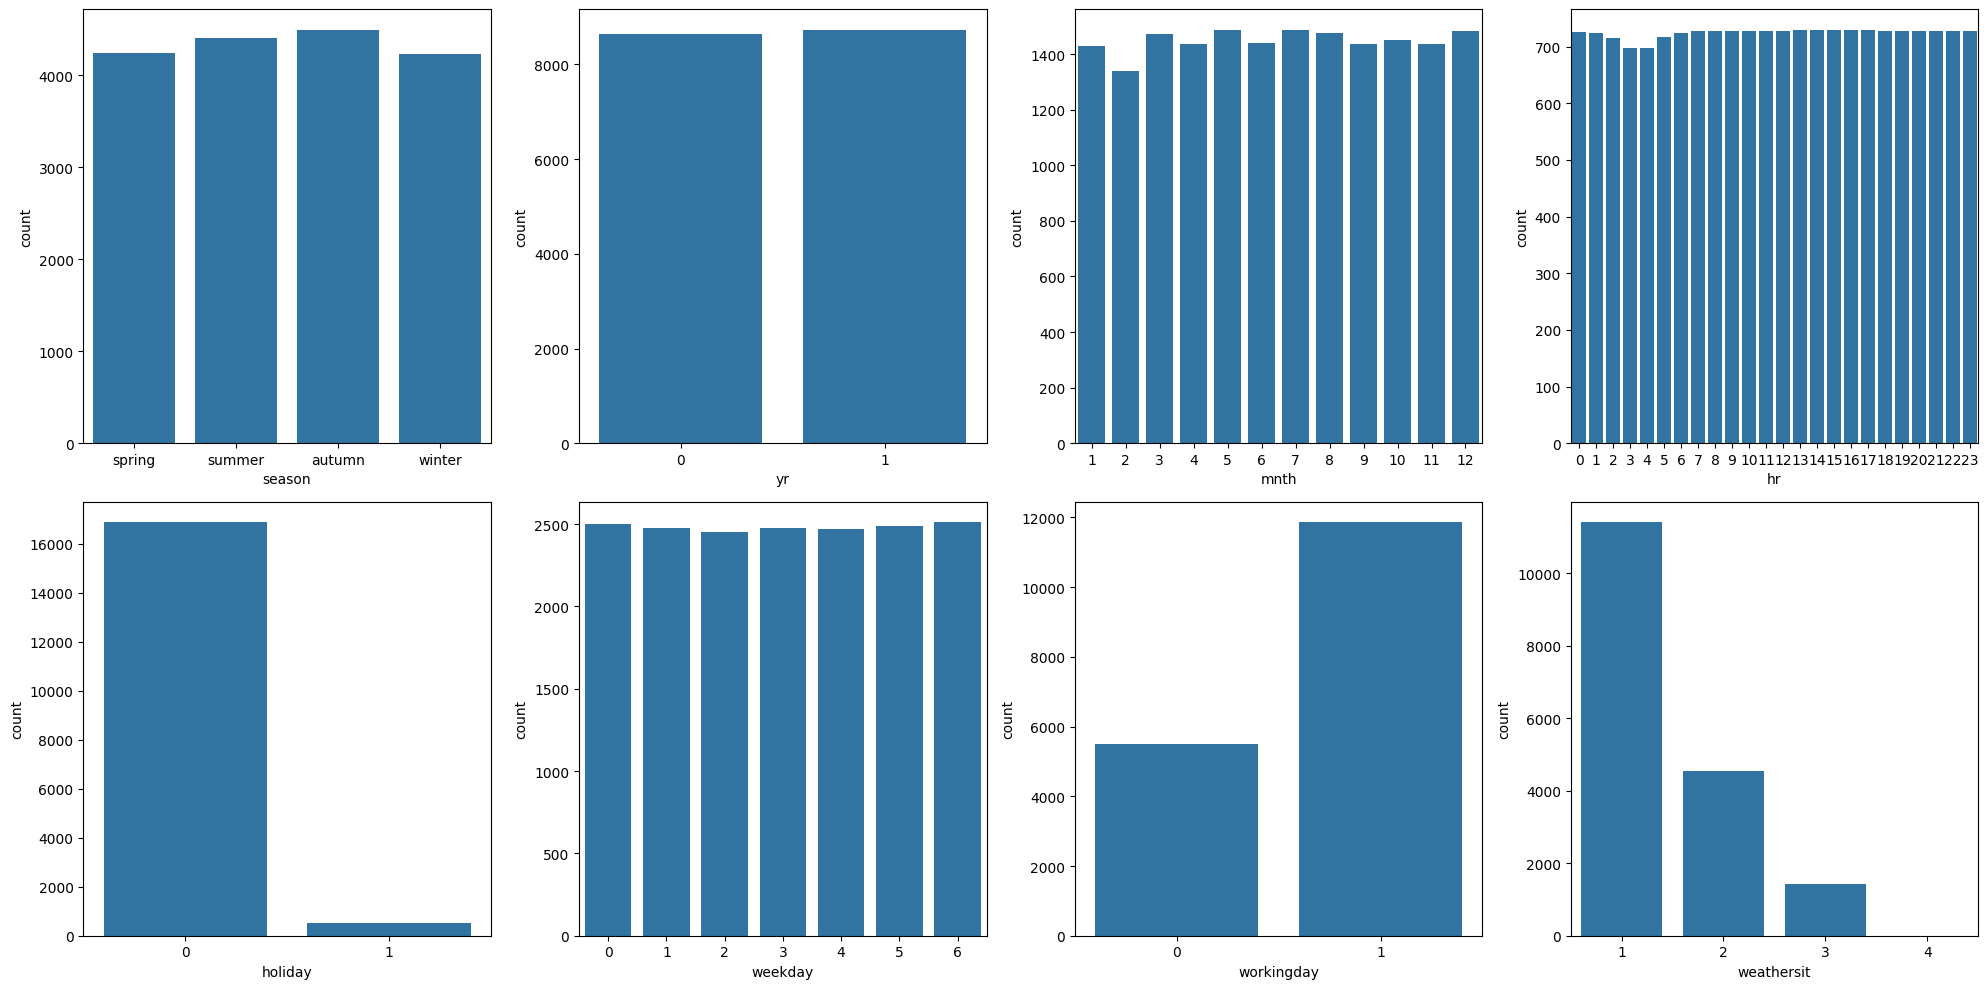

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=variable, data=data_categorical, ax=subplot)

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



5.   Ми відокремили категоріальні змінні у власний датасет для подальшого детального аналізу.
6.   Після заміни значень пори року на числові еквіваленти в нас це успішно вийшло
7.   З графіка стає очевидним, що найбільш активні відвідувачі спостерігаються у весняний період.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [61]:
data_numerical = data[['temp','hum','windspeed','atemp','cnt']]
print(data_numerical.head())

   temp   hum  windspeed   atemp  cnt
0  0.24  0.81        0.0  0.2879   16
1  0.22  0.80        0.0  0.2727   40
2  0.22  0.80        0.0  0.2727   32
3  0.24  0.75        0.0  0.2879   13
4  0.24  0.75        0.0  0.2879    1


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

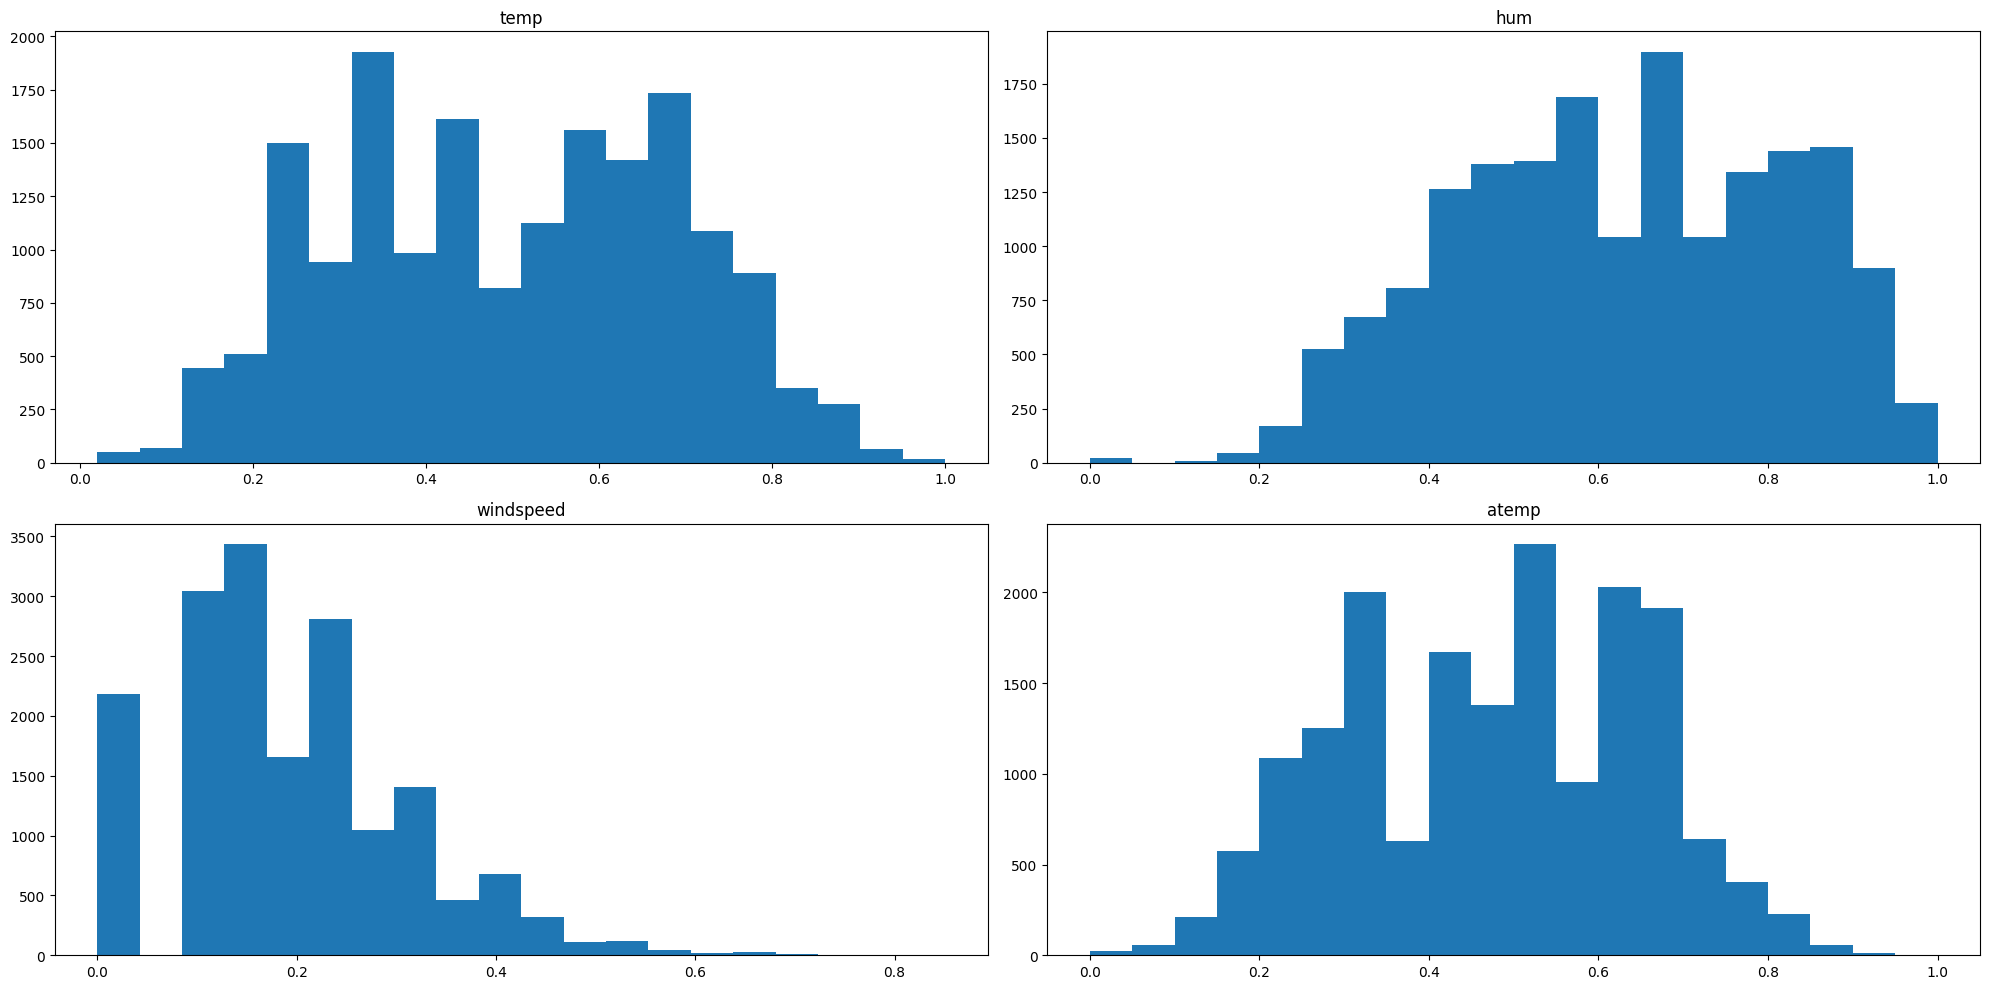

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, variable in enumerate(data_numerical.columns):
    if i < 4:  
        data_without_nan = data_numerical[variable].dropna()
        ax[i // 2, i % 2].hist(data_without_nan, bins=20)
        ax[i // 2, i % 2].set_title(variable)

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness: 1.2774116037490577


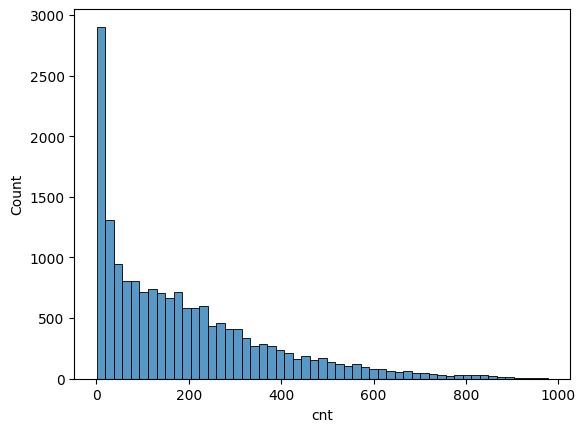

In [63]:
def plot_histogram(data, column):
    sns.histplot(data[column])
    skew_coefficient = data[column].skew()
    print("Skewness:", skew_coefficient)
    plt.show()

plot_histogram(data, 'cnt')

**Висновки з 8-10 завдання (детальні)**


8. Після аналізу ми бачимо, що всі наші змінні мають числові значення, за винятком "season", який містить значення NaN.
9. Ми провели аналіз гістограми розподілу всіх змінних, щоб вивчити їхню взаємодію та розподіл між собою.
10. Розглянувши вигляд нашої гістограми, більшість значень знаходиться у лівій частині графіка, що вказує на лівосторонній перекіс. Це може свідчити про негативну кореляцію цільової змінної з іншими змінними.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

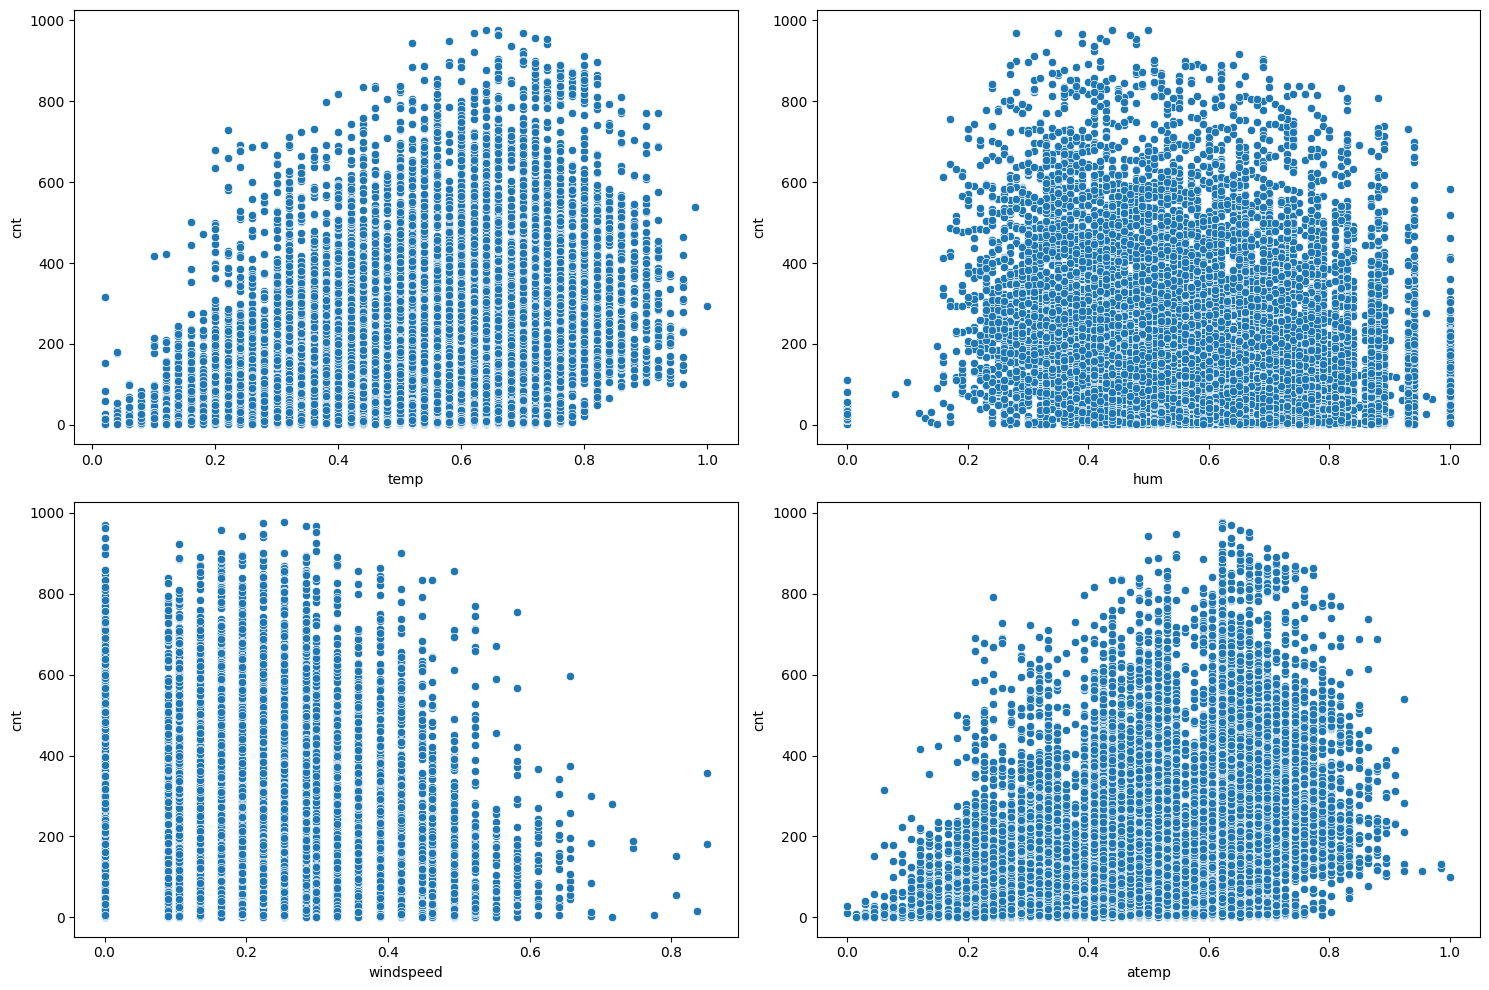

In [64]:
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(x=var, y='cnt', data=data, ax=subplot)

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

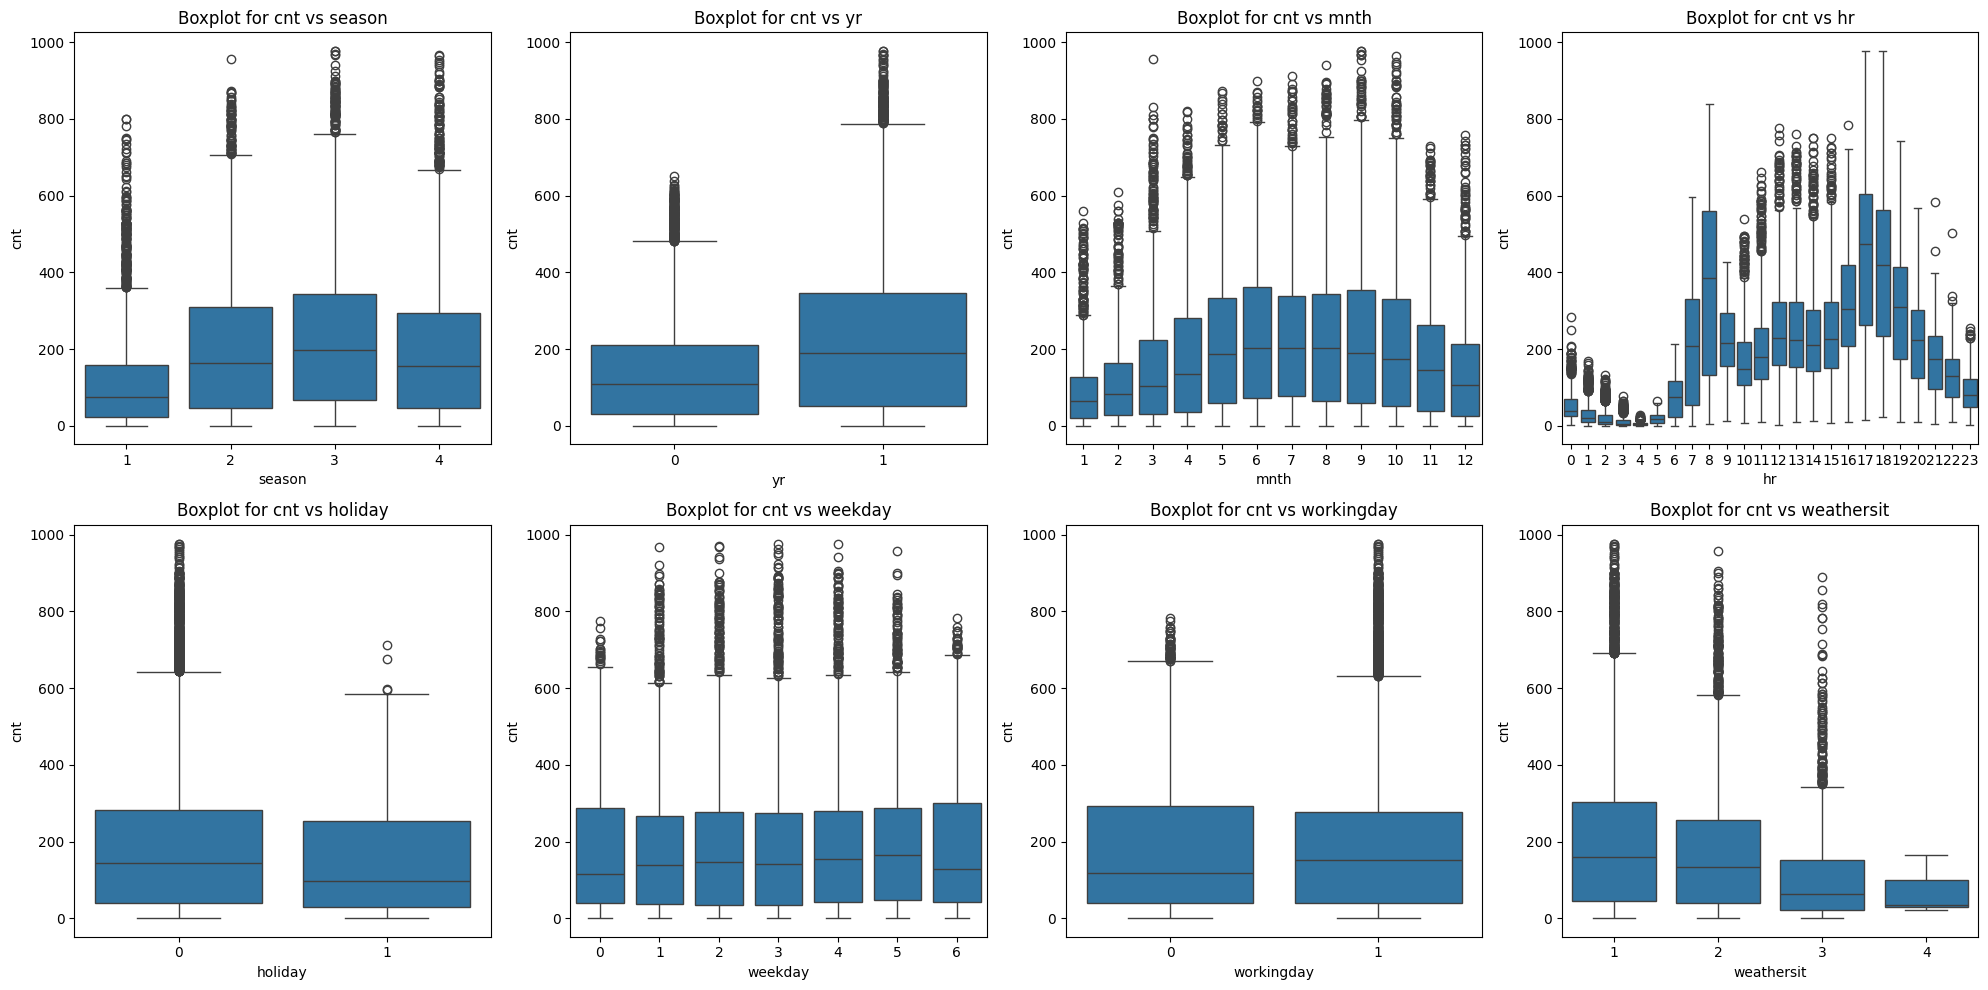

In [65]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, column in enumerate(data_categorical.columns):
    sns.boxplot(x=column, y='cnt', data=data, ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_title(f'Boxplot for cnt vs {column}')
    ax[i // 4, i % 4].set_xlabel(column)
    ax[i // 4, i % 4].set_ylabel('cnt')


plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**


11. Ми побудували графік, який демонструє взаємозв'язок між числовими змінними та цільовою змінною "cnt".
12. На графіках ми проаналізували співвідношення між категоріальними змінними та цільовою змінною.

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

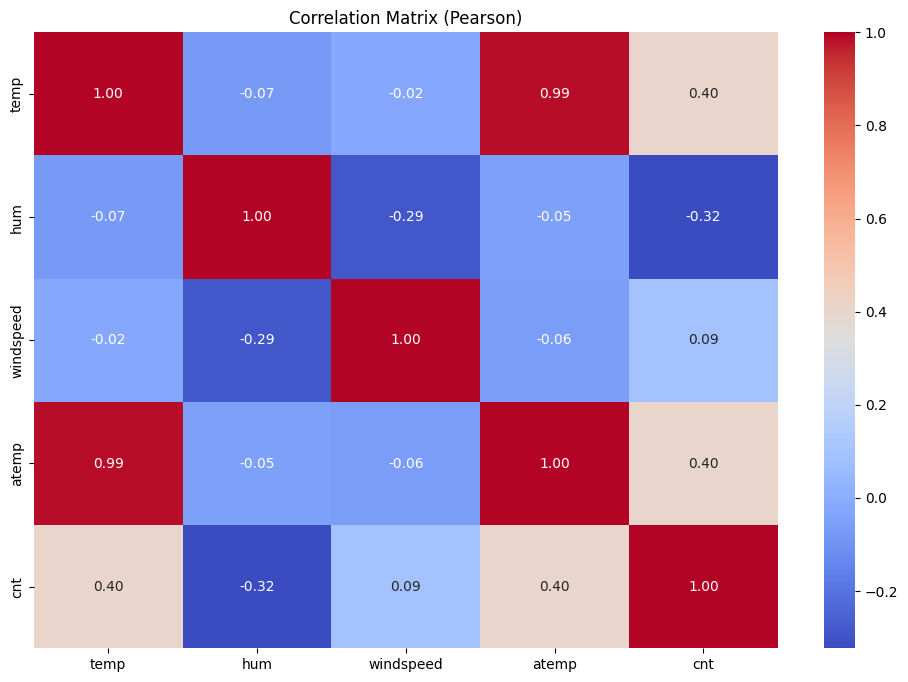

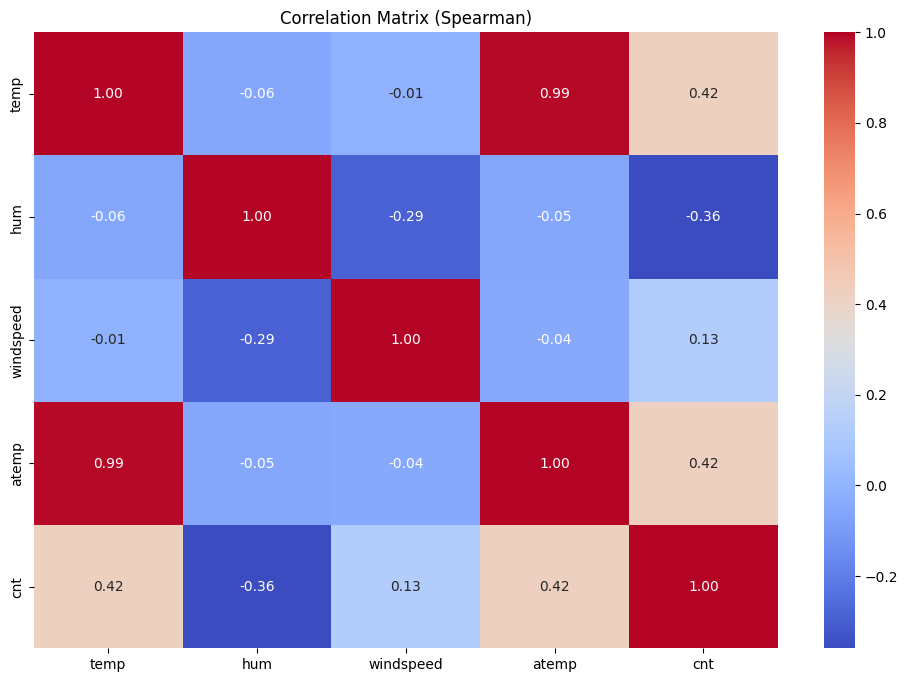

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_pearson = data_numerical.corr(method='pearson')


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Pearson)')
plt.show()

correlation_spearman = data_numerical.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Spearman)')
plt.show()


По матриці Пірсона ми можемо побачити, що значення позитивної кореляяції є між temp та atemp, а також cnt та windspeed. А Сильно негативні між wheathersit та hum, а також між windspeed та hum. Все інше в нас помірні кореляції.
Щодо матриці спірмана можна зауважити, що температура та вологість добре корелюють, тобто коли темп високо , вологість також висока. Також можемо побачити, що температура та кількість опадів негативно корелюють, наприклад коли температура висока опадів менше

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [67]:
def encode_categorical_features(df):
    categorical_columns = ['season', 'mnth', 'weekday', 'weathersit']
    encoded_features = df.copy()
    for column in categorical_columns:
        encoded_column = pd.get_dummies(df[column], prefix=column)
        encoded_features = pd.concat([encoded_features, encoded_column], axis=1)
        encoded_features.drop(column, axis=1, inplace=True)
    return encoded_features

In [68]:
encoded_data = encode_categorical_features(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [69]:
def get_dummies(df):
    columns_to_encode = ['season', 'mnth', 'weekday', 'weathersit']
    features = df.copy()
    for column in columns_to_encode:
        dummies = pd.get_dummies(df[column], prefix=column)
        features = pd.concat([features, dummies], axis=1)
        features.drop(column, axis=1, inplace=True)
    return features

features = get_dummies(data)
features['night_hours'] = features['hr'].apply(lambda x: 1 if (x <= 6 or x >= 18) else 0)
features = features.drop('hr', axis=1)


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [70]:
remaining_columns = ['mnth_4', 'weekday_0', 'weathersit_1', 'atemp', 'date']
features_lr = features.drop(remaining_columns, axis=1)



In [71]:
from sklearn.model_selection import train_test_split

def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(target, axis=1)  
    y = df[target]  

    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    
    return X_train, X_test, y_train, y_test


In [72]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)


In [73]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [74]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19307.491, test: 18960.185
R^2 train: 0.423, test: 0.400


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

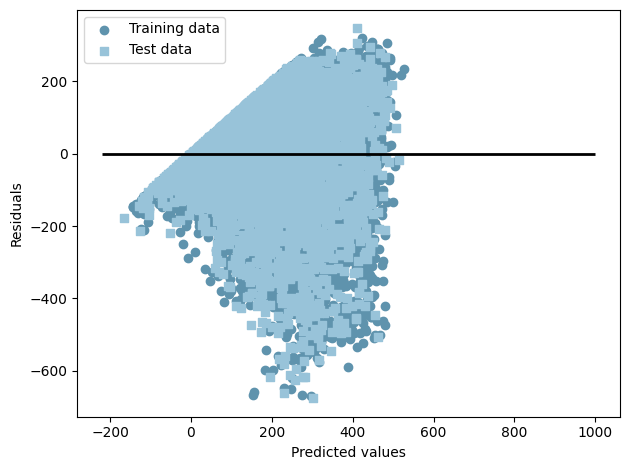

In [75]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**

1. Cтворені фіктивні змінні для корекції неправильного порядку категорій.
2. Для покращення аналізу було вилучено змінні "date" та "atemp", оскільки вони можуть містити менш інформативні дані та дублювати інформацію з іншими змінними.
3. Помітно, що модель надає переважно точні прогнози, оскільки більшість точок зосереджені навколо нульового значення. Однак в деяких випадках можуть відбуватися неточності у прогнозах.